# Importing Required Libraries

We import all the necessary libraries that will be used throughout our machine learning project. Each library has a specific purpose that helps in data handling, visualization, modeling, and evaluation.

- **NumPy**:  
  Used for numerical operations. It handles arrays, mathematical functions, and linear algebra efficiently.

- **Pandas**:  
  Essential for data manipulation and analysis. It helps us read, filter, and structure our dataset using DataFrames.

- **Matplotlib**:  
  Used for creating basic visualizations such as line charts, bar graphs, and histograms.

- **Seaborn**:  
  A statistical data visualization library built on top of Matplotlib. It provides beautiful and informative graphics.

- **Scikit-learn**:  
  The core machine learning library for Python. It provides tools for:
  - Preprocessing (e.g. scaling, train-test split)
  - Building models (e.g. logistic regression, decision trees)
  - Evaluating models (e.g. accuracy, confusion matrix)


- **Pickle**:

  We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.


- Avoids retraining
- Good for deployment
- Makes model portable




In [ ]:
# Numerical and data manipulation 
import numpy as np
import pandas as pd

# Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning tools from sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For save the model
import pickle


# Data Loading and Exploration with Classes

We are creating a single class `DataLoader` which:
- Loads the CSV file into a Pandas DataFrame
- Automatically prints the following information upon method calls:
  

  - `head_data()` ➝ Returns the top rows
  - `tail_data()` ➝ Returns the bottom rows
  - `sample_data()` ➝ Returns a random sample of the data
  - `describe_data()` ➝ Shows statistical summary
  - `info_data()` ➝ Shows data types and nulls


In [100]:
pd.set_option("display.width",1000)

class DataLoader:

    def __init__(self, file_path):
        """
        Initializes the DataLoader with file path
        Loads data into self.df
        """
        self.file_path = file_path
        self.df = None 
    def load_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            return "Data loaded successfully"
        except Exception as e:
            return f"Error loading data : {e} "
        
    def show_head(self):
        print("\nHead of the dataset:")
        return self.df.head()

    def show_tail(self):
        print("\nTail of the dataset:")
        return self.df.tail()
    
    def show_shape(self):
        print("\nRows and columns in the dataset are:")
        return self.df.shape
    def show_sample(self):
        print("\nRandom Sample of the Dataset :")
        return self.df.sample()

    def show_description(self):
        print("\nStatistical summary:")
        return self.df.describe()
        
    def show_info(self):
        print("/nDataset information :")
        return self.df.info()



In [101]:
"""Initialize DataLoader Object with CSV File"""
loader = DataLoader("diabetes.csv")
loader.load_data()


'Data loaded successfully'

In [102]:
loader.show_head()


Head of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
loader.show_tail()


Tail of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [104]:
loader.show_sample()


Random Sample of the Dataset :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
552,6,114,88,0,0,27.8,0.247,66,0


In [105]:
loader.show_description()


Statistical summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
loader.show_info()

/nDataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Cleaning and Preprocessing

We create a new class called `DataCleaner` to handle preprocessing tasks before training a machine learning model.

### Tasks Performed:

1. **Null Value Handling**
   - We check for missing (null) values in the dataset.
   - If any are found, we decide whether to:
     - Drop them
     - Fill them with statistical values (like mean or median)

2. **Zero Value Handling**
   - In medical datasets like this, some features may have zero values which are **not valid** (e.g., 0 blood pressure is not realistic).
   - We treat zeros as missing values **in specific columns only**, and then replace them using:
     - **Mean or Median**, depending on the distribution of the column.

3. **Column Renaming**
   - Columns with long names are converted to **abbreviations or simpler names** to improve readability and code simplicity.
  
   - 'Pregnancies': 'Preg',
   - 'Glucose': 'Glu',
   - 'BloodPressure': 'BP',
   - 'SkinThickness': 'Skin',
   - 'Insulin': 'Ins',
   - 'BMI': 'BMI',
   - 'DiabetesPedigreeFunction': 'DPF',
   - 'Age': 'Age',
   - 'Outcome': 'Outcome'




In [107]:
class DataCleaner:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def check_nulls(self):
        print("\nChecking for null values:")
        return self.df.isnull().sum()

    def replace_zeros(self):
        print("\nHandling zero values in selected columns...")
        # Columns where zero is not a valid value 
        cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

        for col in cols_with_invalid_zeros:
            zero_count = (self.df[col] == 0).sum()
            median_value = self.df[self.df[col] != 0][col].median()
            print(f"Column '{col}' with median value: {median_value}")

    def rename_columns(self):
        print("\nRemaining columns to simpler names....")
        renamed_columns = {
            'Pregnancies': 'Preg',
            'Glucose' : 'Glu',
            'BloodPressure' : 'BP',
            'SkinThickness': 'Skin',
            'Insulin': 'Ins',
            'BMI': 'BMI',
            'DiabetesPedigreeFunction': 'DPF',
            'Age': 'Age',
            'Outcome': 'Outcome'
        }
        self.df.rename(columns=renamed_columns, inplace= True)
        print("Renamed columns successfully.")

    def get_clean_data(self):
        return self.df
        

In [108]:
loader = DataLoader("diabetes.csv")
loader.load_data()
df = loader.df
cleaner = DataCleaner(df)
cleaner.check_nulls()



Checking for null values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
cleaner.replace_zeros()


Handling zero values in selected columns...
Column 'Glucose' with median value: 117.0
Column 'BloodPressure' with median value: 72.0
Column 'SkinThickness' with median value: 29.0
Column 'Insulin' with median value: 125.0
Column 'BMI' with median value: 32.3


In [ ]:
cleaner.rename_columns()


Remaining columns to simpler names....
Renamed columns successfully.


In [111]:
# Get the cleaned and updated dataframe
cleaned_df = cleaner.get_clean_data()
cleaned_df

,Preg,Glu,BP,Skin,Ins,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Statistical Analysis of Dataset

We define a class named `DataStatistics` that gives a deeper insight into the dataset. While `describe()` gives a general overview, we often need specific statistics to make informed decisions about:

- Feature distributions
- Skewness or symmetry
- Outliers detection
- Feature scaling requirements

### Tasks Performed:

1. **Mean** - Average of each feature
2. **Median** - Middle value (less sensitive to outliers)
3. **Mode** - Most frequent value in each column
4. **Max** - Maximum value of each feature
5. **Min** - Minimum value of each feature
6. **Standard Deviation (std)** - Spread of values
7. **Variance** - Square of standard deviation
8. **Count** - Number of non-null entries per column

This class helps us understand how each feature behaves statistically, which is crucial for preprocessing and model building.


In [112]:
class DataStatistics:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
    
    def show_mean(self):
        print("\nMean of each column:")
        return self.df.mean()
    def show_median(self):
        print("\nMedian of each column:")
        return self.df.median()
    def show_mode(self):
        print("\nMode of each column:")
        return self.df.mode()
    def show_max(self):
        print("\nMaximum value in each column:")
        return self.df.max()
    def show_min(self):
        print("\nMinimum value in each column:")
        return self.df.min()
    def show_std(self):
        print("\nStandard Deviation of each column:")
        return self.df.std()
    def show_variance(self):
        print("\nVariance of each column:")
        return self.df.var()
    def show_count(self):
        print("\nCount of non-null values in each column:")
        return self.df.count()

In [113]:
# Assuming 'cleaned_df' is the dataframe after cleaning
stats = DataStatistics(cleaned_df)

stats.show_mean()


Mean of each column:


Preg         3.845052
Glu        120.894531
BP          69.105469
Skin        20.536458
Ins         79.799479
BMI         31.992578
DPF          0.471876
Age         33.240885
Outcome      0.348958
dtype: float64

In [114]:
stats.show_median()


Median of each column:


Preg         3.0000
Glu        117.0000
BP          72.0000
Skin        23.0000
Ins         30.5000
BMI         32.0000
DPF          0.3725
Age         29.0000
Outcome      0.0000
dtype: float64

In [115]:
stats.show_mode()


Mode of each column:


,Preg,Glu,BP,Skin,Ins,BMI,DPF,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [116]:
stats.show_max()


Maximum value in each column:


Preg        17.00
Glu        199.00
BP         122.00
Skin        99.00
Ins        846.00
BMI         67.10
DPF          2.42
Age         81.00
Outcome      1.00
dtype: float64

In [117]:
stats.show_min()


Minimum value in each column:


Preg        0.000
Glu         0.000
BP          0.000
Skin        0.000
Ins         0.000
BMI         0.000
DPF         0.078
Age        21.000
Outcome     0.000
dtype: float64

In [ ]:
stats.show_std()


Standard Deviation of each column:


Preg         3.369578
Glu         31.972618
BP          19.355807
Skin        15.952218
Ins        115.244002
BMI          7.884160
DPF          0.331329
Age         11.760232
Outcome      0.476951
dtype: float64

In [119]:
stats.show_variance()


Variance of each column:


Preg          11.354056
Glu         1022.248314
BP           374.647271
Skin         254.473245
Ins        13281.180078
BMI           62.159984
DPF            0.109779
Age          138.303046
Outcome        0.227483
dtype: float64

In [120]:
stats.show_count()


Count of non-null values in each column:


Preg       768
Glu        768
BP         768
Skin       768
Ins        768
BMI        768
DPF        768
Age        768
Outcome    768
dtype: int64

# Exploratory Data Analysis: Univariate & Bivariate

We define two separate classes to perform core EDA tasks:

## 1. Univariate Analysis
Focuses on a single feature to understand:
- Its distribution
- Central tendency
- Spread
- Number of unique values
- Value counts for categorical-like features

In [121]:
class UnivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def unique_counts(self, column):
        print(f"\nUnique values in '{column}':")
        return self.df[column].nunique()

    def value_counts(self, column):
        print(f"\nValue counts in '{column}':")
        return self.df[column].value_counts()

    def column_summary(self, column):
        print(f"\nSummary statistics for '{column}':")
        return self.df[column].describe()

    def check_skewness(self, column):
        return f"\nSkewness of '{column}': {self.df[column].skew()}"

    def check_kurtosis(self, column):
        return f"\nKurtosis of '{column}': {self.df[column].kurt()}"


In [122]:
# Univariate
uni = UnivariateAnalysis(cleaned_df)
uni.unique_counts('Age')


Unique values in 'Age':


52

In [123]:
uni.value_counts('Glu')


Value counts in 'Glu':


Glu
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [124]:
uni.column_summary('BMI')


Summary statistics for 'BMI':


count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [ ]:
uni.check_skewness('BP')

"\nSkewness of 'BP': -1.8436079833551302"

In [126]:
uni.check_kurtosis('Ins')

"\nKurtosis of 'Ins': 7.2142595543487715"

## 2. Bivariate Analysis
Focuses on the relationship between two variables:
- Correlation
- Covariance
- Group-wise statistics (mean, count, etc.)
- Crosstab for categorical combinations

These classes help break down the dataset into understandable chunks so that patterns can emerge before we jump into modeling.

In [127]:
class BivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def correlation_matrix(self):
        print("\nCorrelation matrix:")
        print(self.df.corr())

    def covariance_matrix(self):
        print("\nCovariance matrix:")
        print(self.df.cov())

    def group_mean_by_target(self, target_col):
        print(f"\nMean of each feature grouped by '{target_col}':")
        print(self.df.groupby(target_col).mean())

    def group_count_by_target(self, target_col):
        print(f"\nCount of entries grouped by '{target_col}':")
        print(self.df.groupby(target_col).count())

    def crosstab_two_columns(self, col1, col2):
        print(f"\nCrosstab between '{col1}' and '{col2}':")
        print(pd.crosstab(self.df[col1], self.df[col2]))


In [ ]:
# Bivariate
bi = BivariateAnalysis(cleaned_df)  
bi.correlation_matrix()


Correlation matrix:
             Preg       Glu        BP      Skin       Ins       BMI       DPF       Age   Outcome
Preg     1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523  0.544341  0.221898
Glu      0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337  0.263514  0.466581
BP       0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265  0.239528  0.065068
Skin    -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928 -0.113970  0.074752
Ins     -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071 -0.042163  0.130548
BMI      0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647  0.036242  0.292695
DPF     -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000  0.033561  0.173844
Age      0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561  1.000000  0.238356
Outcome  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844  0.238356  1.000000

In [ ]:
bi.covariance_matrix()  


Covariance matrix:
              Preg          Glu          BP        Skin           Ins         BMI       DPF         Age   Outcome
Preg     11.354056    13.947131    9.214538   -4.390041    -28.555231    0.469774 -0.037426   21.570620  0.356618
Glu      13.947131  1022.248314   94.430956   29.239183   1220.935799   55.726987  1.454875   99.082805  7.115079
BP        9.214538    94.430956  374.647271   64.029396    198.378412   43.004695  0.264638   54.523453  0.600697
Skin     -4.390041    29.239183   64.029396  254.473245    802.979941   49.373869  0.972136  -21.381023  0.568747
Ins     -28.555231  1220.935799  198.378412  802.979941  13281.180078  179.775172  7.066681  -57.143290  7.175671
BMI       0.469774    55.726987   43.004695   49.373869    179.775172   62.159984  0.367405    3.360330  1.100638
DPF      -0.037426     1.454875    0.264638    0.972136      7.066681    0.367405  0.109779    0.130772  0.027472
Age      21.570620    99.082805   54.523453  -21.381023    -57.14329

In [130]:
bi.group_mean_by_target('Outcome')


Mean of each feature grouped by 'Outcome':
             Preg         Glu         BP       Skin         Ins        BMI       DPF        Age
Outcome                                                                                        
0        3.298000  109.980000  68.184000  19.664000   68.792000  30.304200  0.429734  31.190000
1        4.865672  141.257463  70.824627  22.164179  100.335821  35.142537  0.550500  37.067164


In [131]:
bi.group_count_by_target('Outcome')


Count of entries grouped by 'Outcome':
         Preg  Glu   BP  Skin  Ins  BMI  DPF  Age
Outcome                                          
0         500  500  500   500  500  500  500  500
1         268  268  268   268  268  268  268  268


In [132]:
bi.crosstab_two_columns('Preg', 'Outcome')


Crosstab between 'Preg' and 'Outcome':
Outcome    0   1
Preg            
0         73  38
1        106  29
2         84  19
3         48  27
4         45  23
5         36  21
6         34  16
7         20  25
8         16  22
9         10  18
10        14  10
11         4   7
12         5   4
13         5   5
14         0   2
15         0   1
17         0   1


# Univariate Data Visualization

These plots explore the **distribution and characteristics of individual columns** (features).

### Plots Covered:
1. Histogram - Frequency distribution
2. Boxplot - Detect outliers and spread
3. KDE Plot - Smoothed version of histogram
4. Countplot - For categorical variables (like target column)


In [ ]:
class UnivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def plot_histogram(self, column, bins=30, color='skyblue', edgecolor='black', figsize=(8, 4)):
        print(f"\nHistogram for '{column}'")
        plt.figure(figsize=figsize)
        plt.hist(self.df[column], bins=bins, color=color, edgecolor=edgecolor)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_boxplot(self, column, color='salmon', figsize=(6, 4), orient='v'):
        print(f"\nBoxplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.boxplot(y=self.df[column], color=color)
        else:
            sns.boxplot(x=self.df[column], color=color)
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

    def plot_kde(self, column, color='purple', shade=True, figsize=(8, 4)):
        print(f"\nKDE Plot for '{column}'")
        plt.figure(figsize=figsize)
        sns.kdeplot(self.df[column], fill=shade, color=color)
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

    def plot_countplot(self, column, palette='Set2', figsize=(6, 4), orient='v'):
        print(f"\nCountplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.countplot(x=self.df[column], palette=palette)
        else:
            sns.countplot(y=self.df[column], palette=palette)
        plt.title(f'Countplot of {column}')
        plt.tight_layout()
        plt.show()



### _**Glucose Value Distribution**_

**This histogram shows the frequency distribution of glucose levels among the patients**.
**Most values are concentrated around 100–150, indicating that many individuals in the dataset have borderline or elevated glucose levels.**
**It highlights the central tendency and possible skewness in glucose levels.**



Histogram for 'Glu'


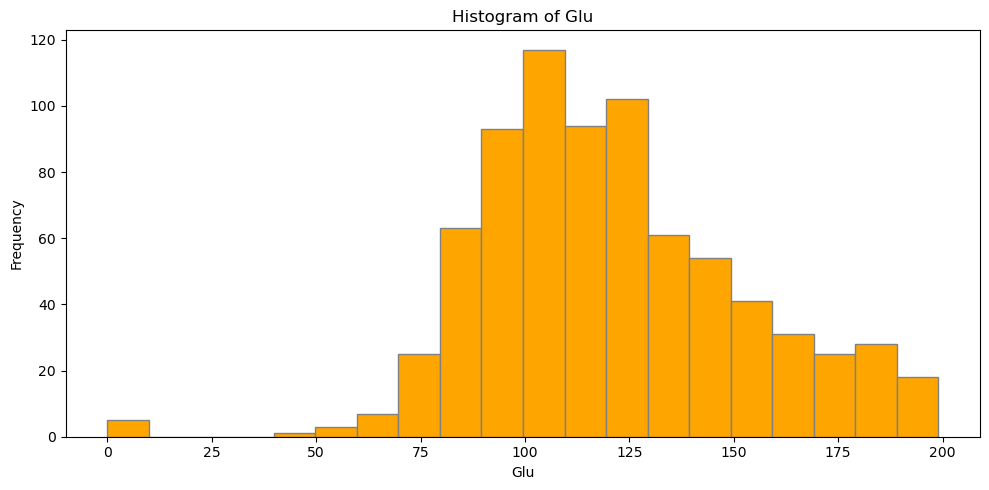

In [134]:
plotter = UnivariatePlots(cleaned_df)

# Histogram with custom color and bins
plotter.plot_histogram("Glu", bins=20, color="orange", edgecolor="gray", figsize=(10, 5))

### **Boxplot horizontal**

**This boxplot of BMI (Body Mass Index) reveals the spread, median, and outliers in the BMI distribution.**
**The presence of outliers on the higher side suggests some individuals have significantly high BMI, potentially indicating obesity.**


Boxplot for 'BMI'


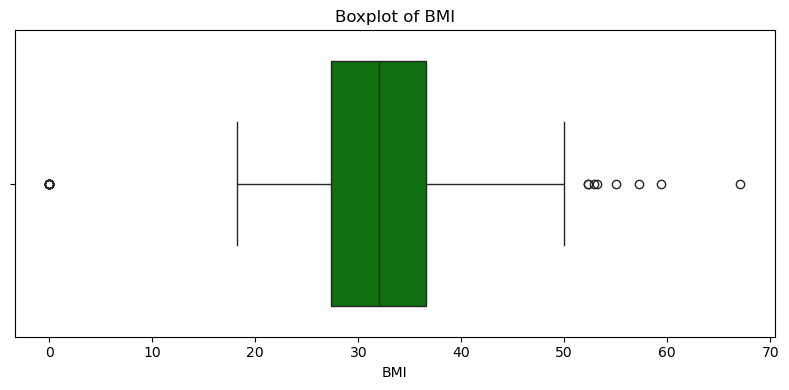

In [135]:
# Boxplot horizontal
plotter.plot_boxplot("BMI", color="green", figsize=(8, 4), orient='h')


### **KDE Plot with custom shade color**

**This KDE (Kernel Density Estimate) plot shows a smoothed version of the age distribution.**
**It helps us understand how age is distributed in the population, with most patients falling between the ages of 20 and 50.**


KDE Plot for 'Age'


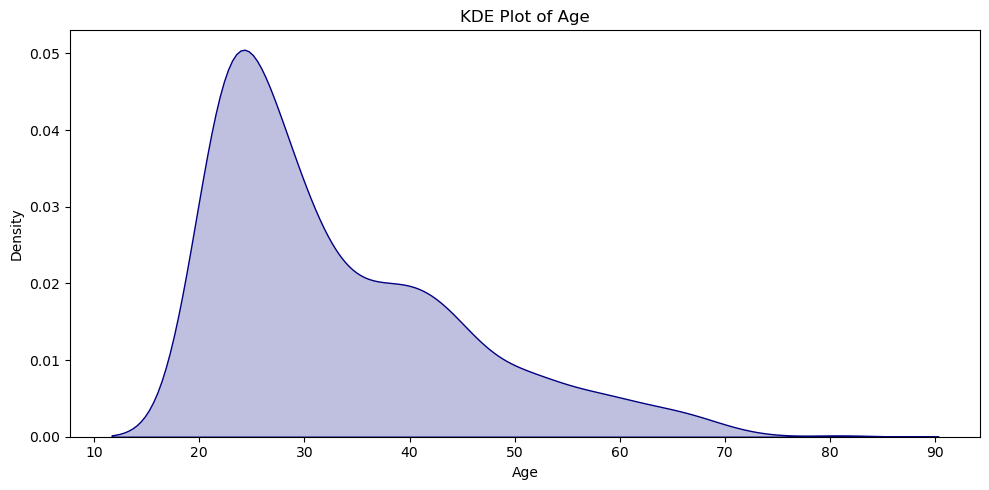

In [136]:
# KDE Plot with custom shade color
plotter.plot_kde("Age", color="navy", shade=True, figsize=(10, 5))

### _**Class Distribution (Diabetes Outcome)**_

**This plot shows the number of diabetic vs non-diabetic patients. A balanced dataset helps ensure that the model does not favor one class over the other.**



Countplot for 'Outcome'


C:\Users\MY TRADERS\AppData\Local\Temp\ipykernel_15736\2634174423.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[column], palette=palette)


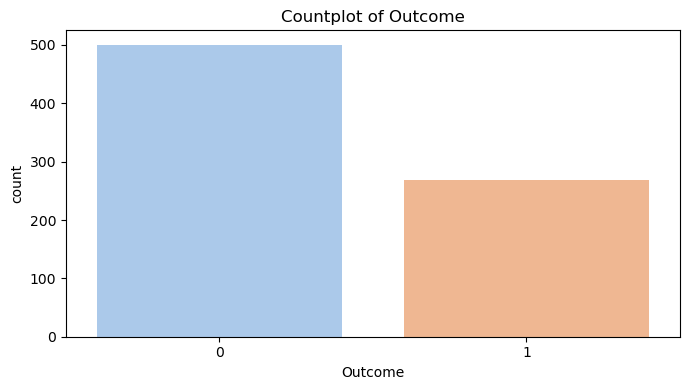

In [ ]:
# Countplot for Outcome (categorical)
plotter.plot_countplot("Outcome", palette="pastel", figsize=(7, 4))

# Bivariate Data Visualization

These plots explore the **relationship between two features**.

### Plots Covered:
1. Scatter Plot - Numerical vs Numerical
2. Heatmap - Correlation matrix in visual form
3. Boxplot by Category - Spread across classes
4. Pairplot - Multiple pairwise scatterplots


In [138]:
class BivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def scatter_plot(self, col1, col2, hue='Outcome', palette='coolwarm', figsize=(8, 5)):
        print(f"\nScatter Plot: '{col1}' vs '{col2}'")
        plt.figure(figsize=figsize)
        sns.scatterplot(x=self.df[col1], y=self.df[col2], hue=self.df[hue], palette=palette)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.tight_layout()
        plt.show()

    def correlation_heatmap(self, annot=True, cmap='coolwarm', figsize=(10, 8)):
        print("\nCorrelation Heatmap")
        plt.figure(figsize=figsize)
        sns.heatmap(self.df.corr(), annot=annot, cmap=cmap, fmt=".2f", square=True)
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def boxplot_by_category(self, numerical_col, category_col='Outcome', palette='pastel', figsize=(7, 5)):
        print(f"\nBoxplot: '{numerical_col}' grouped by '{category_col}'")
        plt.figure(figsize=figsize)
        sns.boxplot(x=self.df[category_col], y=self.df[numerical_col], palette=palette)
        plt.title(f'Boxplot of {numerical_col} by {category_col}')
        plt.tight_layout()
        plt.show()

    def pairplot(self, columns=None, hue='Outcome', palette='husl'):
        print(f"\nPairplot of selected features")
        if columns:
            sns.pairplot(self.df[columns], hue=hue, palette=palette)
        else:
            sns.pairplot(self.df, hue=hue, palette=palette)
        plt.tight_layout()
        plt.show()


### **Custom scatter plot**

**This scatter plot shows the relationship between Glucose and Insulin levels.**
**Points are colored by the Outcome column.**
**We can see that diabetic patients (Outcome=1) tend to have higher glucose and insulin levels, forming a visible cluster.**


Scatter Plot: 'Glu' vs 'Ins'


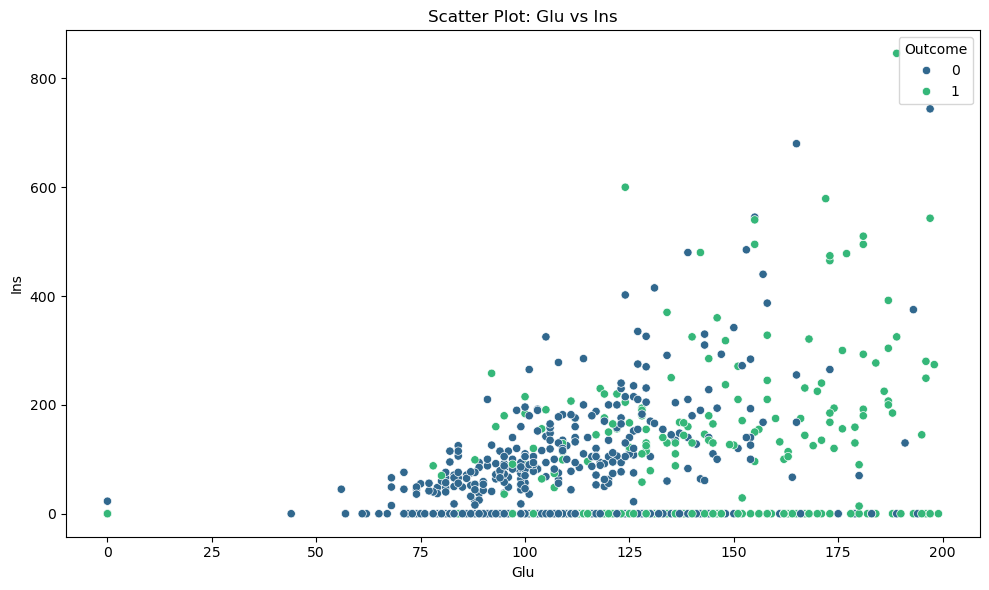

In [139]:
plotter = BivariatePlots(cleaned_df)

# Custom scatter plot
plotter.scatter_plot("Glu", "Ins", palette='viridis', figsize=(10, 6))

### _**Correlation Matrix**_

**This heatmap shows how each feature correlates with others. Features like Glucose and BMI have a strong positive correlation with the Outcome (diabetes), which makes them important predictors.**



Correlation Heatmap


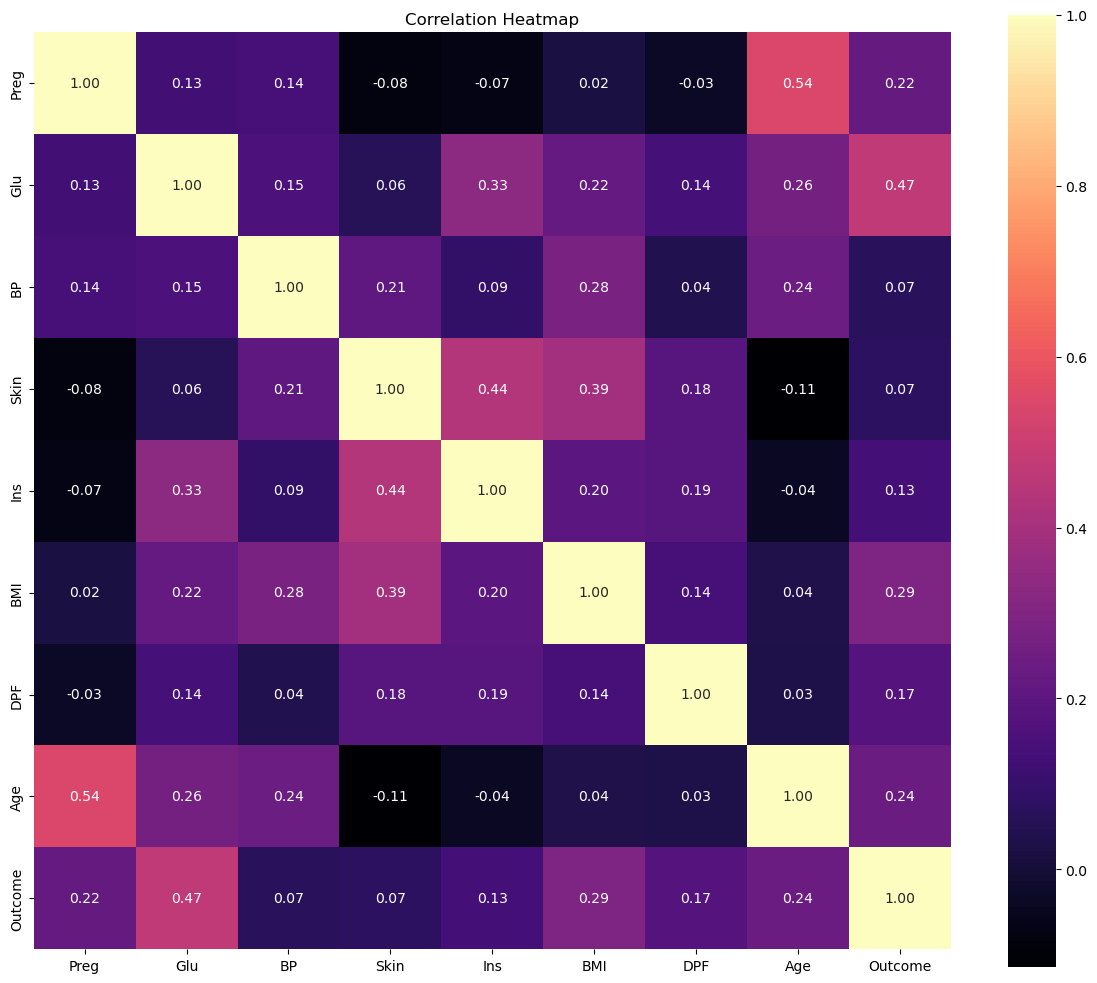

In [140]:
# 🔸 Correlation heatmap with different cmap
plotter.correlation_heatmap(cmap='magma', figsize=(12, 10))

### **BMI vs Outcome**

**This boxplot shows that diabetic patients tend to have a higher BMI than non-diabetics. This supports the assumption that BMI is an important feature for prediction.**



Boxplot: 'BMI' grouped by 'Outcome'


C:\Users\MY TRADERS\AppData\Local\Temp\ipykernel_15736\1175187027.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.df[category_col], y=self.df[numerical_col], palette=palette)


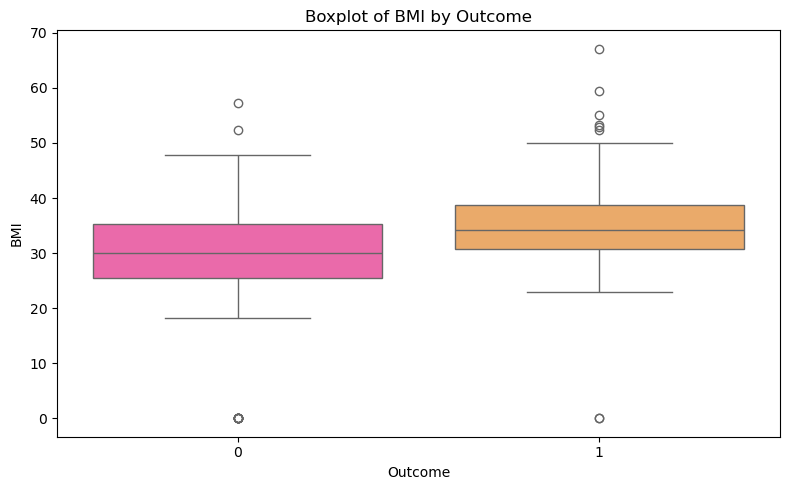

In [ ]:
# 🔸 Boxplot with custom size and palette
plotter.boxplot_by_category("BMI", palette="spring", figsize=(8, 5))


# Machine Learning Workflow

Now we move to training the model. This part includes:

1. **Splitting the Data**  
   - Train-test split using `sklearn.model_selection`

2. **Training the Model**  
   - We use `Logistic Regression` for binary classification (`Outcome` column)

3. **Evaluating the Model**  
   - Accuracy, Confusion Matrix, Classification Report

4. **Predicting with the Model**  
   - Using model to predict new or test data

Every block is wrapped in a separate class to keep things clean and modular.


In [142]:
class DataSplitter:
    def __init__(self, dataframe, target_column):
        self.df = dataframe
        self.target = target_column

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(self.target, axis=1)
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

class ModelTrainer:
    def __init__(self):
        self.model = LogisticRegression(max_iter=1000)

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.predictions = self.model.predict(self.X_test)

    def show_prediction(self):
        return self.predictions
    
    def show_accuracy(self):
        print("\nAccuracy Score:")
        return accuracy_score(self.y_test, self.predictions)
    
    def show_confusion_matrix(self):
        print("\nConfusion Matrix:")
        return confusion_matrix(self.y_test, self.predictions)
    
    def show_classification_report(self):
        print("\nClassification Report:")
        return classification_report(self.y_test, self.predictions)


class Predictor:
    def __init__(self, model):
        self.model = model

    def predict(self, new_data):
        prediction = self.model.predict(new_data)
        return prediction


In [143]:
# Splitting the data
splitter = DataSplitter(cleaned_df, target_column='Outcome')
X_train, X_test, y_train, y_test = splitter.split_data(test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     Preg  Glu   BP  Skin  Ins   BMI    DPF  Age
 60      2   84    0     0    0   0.0  0.304   21
 618     9  112   82    24    0  28.2  1.282   50
 346     1  139   46    19   83  28.7  0.654   22
 294     0  161   50     0    0  21.9  0.254   65
 231     6  134   80    37  370  46.2  0.238   46
 ..    ...  ...  ...   ...  ...   ...    ...  ...
 71      5  139   64    35  140  28.6  0.411   26
 106     1   96  122     0    0  22.4  0.207   27
 270    10  101   86    37    0  45.6  1.136   38
 435     0  141    0     0    0  42.4  0.205   29
 102     0  125   96     0    0  22.5  0.262   21
 
 [614 rows x 8 columns],
      Preg  Glu  BP  Skin  Ins   BMI    DPF  Age
 668     6   98  58    33  190  34.0  0.430   43
 324     2  112  75    32    0  35.7  0.148   21
 624     2  108  64     0    0  30.8  0.158   21
 690     8  107  80     0    0  24.6  0.856   34
 473     7  136  90     0    0  29.9  0.210   50
 ..    ...  ...  ..   ...  ...   ...    ...  ...
 355     9  165  88     0    0

In [144]:
# Step 2: Training the model
trainer = ModelTrainer()
trainer.train_model(X_train, y_train)


In [145]:
# Evaluating the model
evaluator = ModelEvaluator(trainer.model, X_test, y_test)
evaluator


In [146]:
# Show predictions
predictions = evaluator.show_prediction()
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [147]:
# Accuracy score
accuracy = evaluator.show_accuracy()
print(accuracy)



Accuracy Score:
0.7467532467532467


In [ ]:

evaluator.show_classification_report()


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

In [149]:
# Confusion matrix
evaluator.show_confusion_matrix()



Confusion Matrix:


array([[78, 21],
       [18, 37]], dtype=int64)

In [150]:
# 4. Predict on new/test data (Optional)

predictor = Predictor(trainer.model)



In [151]:

new_data = pd.DataFrame({
    'Preg': [2],
    'Glu': [130],
    'BP': [80],
    'Skin': [25],
    'Ins': [100],
    'BMI': [30.5],
    'DPF': [0.4],
    'Age': [35]
})

# Prediction (0 = No Diabetes, 1 = Diabetes)
result = predictor.predict(new_data)
print("Predicted Outcome:", "Diabetic" if result[0] == 1 else "Not Diabetic")


Predicted Outcome: Not Diabetic


# Saving and Loading Trained Model with Pickle

We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.

### Why Use Pickle?
- Avoids retraining
- Good for deployment
- Makes model portable

The `PickleHandler` class has methods to save and load the model.


In [ ]:
class PickleHandler:
    def __init__(self, filepath='diabetes_model.pkl'):
        self.filepath = filepath

    def save_model(self, model):
        with open(self.filepath, 'wb') as file:
            pickle.dump(model, file)
        print(f"✅ Model saved to '{self.filepath}' successfully.")

    def load_model(self):
        with open(self.filepath, 'rb') as file:
            model = pickle.load(file)
        print(f"✅ Model loaded from '{self.filepath}' successfully.")
        return model



In [153]:
# 1. After training the model
pickle_handler = PickleHandler()
pickle_handler.save_model('diabetes_model.pkl')

# # Predict using the loaded model
# predictor = pickle_handler.load_model()

# Predictor(predictor)  

# # Example input for prediction
# new_input = pd.DataFrame({
#     'Preg': [4],
#     'Glu': [140],
#     'BP': [70],
#     'Skin': [20],
#     'Ins': [80],
#     'BMI': [33.0],
#     'DPF': [0.6],
#     'Age': [45]
# })

# result = predictor.predict(new_input)
# print("Prediction from Pickled Model:", "Diabetic" if result[0] == 1 else "Not Diabetic")


✅ Model saved to 'diabetes_model.pkl' successfully.
